(launch:thebe)=
# Linear Programming
click the {fa}`rocket` --> {guilabel}`Live Code` button above on this page, and run the code below.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os.path as op

import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import linprog

We are going to use the funcion ***[linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)*** from the scipy library <br>
The constraints of this library are that it can online **minimize** a function and that the inequalities need to be given as **$\leq$**

**Maximize:** 

$$z = x+2y$$

**Subject to:** <br>

$$2x+y \leq 20$$

$$-4x+5y \leq 10$$

$$-x + 2y \geq -2$$

$$-x + 5y = 15$$

$$x \geq 0$$

$$y \geq 0$$

As we are going to use the scipy library, first we need to:
- Transform the function so the problem consists on minimizing and not maximizing
- Translate the inequations to $\leq$ since scipy doesn't recognize $\geq$

**Minimize:** 

$$ -z = -x -2y$$ 

**Subject to:**

$$2x+y \leq 20$$

$$-4x+5y \leq 10$$

$$x - 2y \leq 2$$

$$-x + 5y = 15$$

$$x \geq 0$$

$$y \geq 0$$

**STEPS**

We are going to use the funcion ***[linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)*** defined as: <br>

**scipy.optimize.linprog**(**c**, **A_ub**=None, **b_ub**=None, **A_eq**=None, **b_eq**=None, **bounds**=None) <br>

Where:
- c: The coefficients of the linear objective function to be minimized.
- A_ub: The inequality constraint matrix. (Left side)
- b_ub: The inequality constraint vector. (Right side)

- A_eq: The equality constraint matrix. (Left side)
- b_eq: The equality constraint vector. (Right side)

- bounds: A sequence of (min, max) pairs for each element in x

So we need to define the values for all of these variables

1) **Define the objective function**

In [2]:
obj = [-1, -2] #Coefficients for x and y


2) **Define the inequalities**

In [3]:
#Left side of the inequality
lhs_ineq = [[ 2,  1], 
            [-4,  5], 
            [ 1, -2]]  

#Right of the inequality
rhs_ineq = [20,  
            10, 
            2] 

3) **Define the equalities**

In [4]:
#Left side of the equality
lhs_eq = [[-1, 5]]  

#Right of the equality
rhs_eq = [15] 

4) **Define the bounds**

In [5]:
bnd = [(0, np.inf),  # Bounds of x
       (0, np.inf)]  # Bounds of y

---

**Plot feasible region**

In [6]:
min_x, max_x = 0, 15 #Region to assess the functions
min_y, max_y = 0, 15 #Region to assess the functions

x=np.linspace(min_x, max_x, 150)
xx, yy = np.meshgrid(np.linspace(min_x, max_x, 100), np.linspace(min_x, max_x, 100))

In [7]:
#We create a mask with the feasible region

index = np.full(np.shape(xx), 0)
for ie in range(len(rhs_ineq)):
    z = lhs_ineq[ie][0]*xx + lhs_ineq[ie][1]*yy
    index[np.where(z <= rhs_ineq[ie])] += 1 
mask = np.where(index < len(rhs_ineq), np.nan, 1)


In [8]:
zz = mask * (obj[0]*xx + obj[1]*yy)

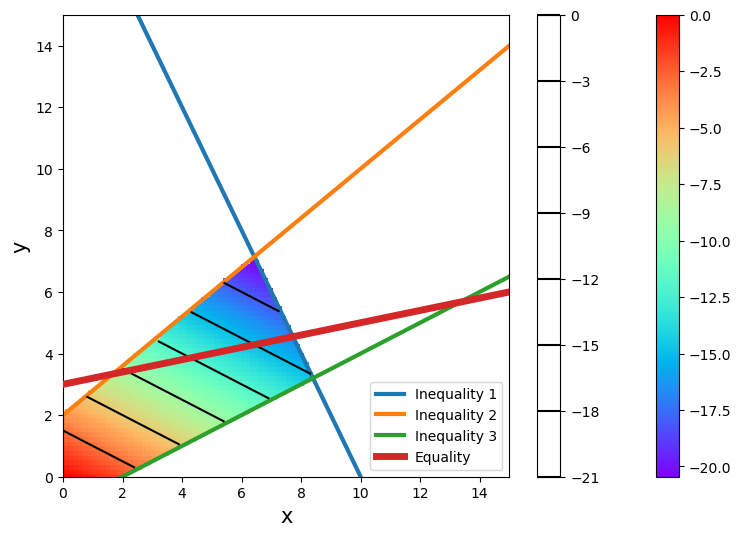

In [9]:
fig, ax = plt.subplots(figsize = [9, 6])

ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)

sizes = [5, 10, 15]

#Inequalities
for ie in range(len(rhs_ineq)):    
    y = (rhs_ineq[ie] - lhs_ineq[ie][0]*x) / lhs_ineq[ie][1]
    ax.plot(x, y, label = 'Inequality ' + str(ie+1), linewidth = 3, zorder = 2)
    
#Equalities
for ie in range(len(rhs_eq)):    
    y = (rhs_eq[ie] - lhs_eq[ie][0]*x) / lhs_eq[ie][1]
    ax.plot(x, y, label =  'Equality', linewidth = 5, zorder = 3)   
    
im = ax.pcolormesh(xx, yy, zz, cmap = 'rainbow')
im2 = ax.contour(xx, yy, zz, colors = 'black', linestyles = '-')
  
plt.legend()
ax.set_xlim([0, max(x)])
ax.set_ylim([0, max(x)])
plt.colorbar(im)
plt.colorbar(im2)

5) **Optimize**

Apply the scipy ***linprog*** function

In [10]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd)

In [11]:
opt

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -16.818181818181817
              x: [ 7.727e+00  4.545e+00]
            nit: 0
          lower:  residual: [ 7.727e+00  4.545e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-2.727e-01]
        ineqlin:  residual: [ 0.000e+00  1.818e+01  3.364e+00]
                 marginals: [-6.364e-01 -0.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

---

**Plot result**

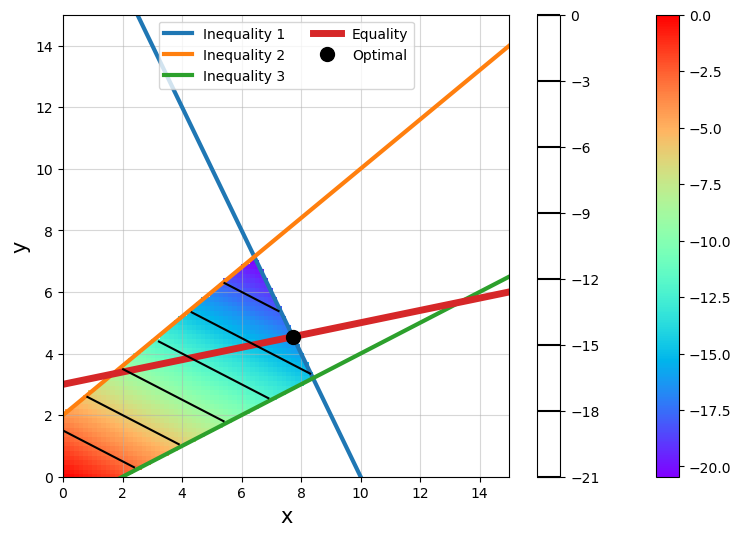

In [12]:
fig, ax = plt.subplots(figsize = [9, 6])

ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)

sizes = [5, 10, 15]

#Inequalities
for ie in range(len(rhs_ineq)):    
    y = (rhs_ineq[ie] - lhs_ineq[ie][0]*x) / lhs_ineq[ie][1]
    ax.plot(x, y, label = 'Inequality ' + str(ie+1), linewidth = 3)
    
#Equalities
for ie in range(len(rhs_eq)):    
    y = (rhs_eq[ie] - lhs_eq[ie][0]*x) / lhs_eq[ie][1]
    ax.plot(x, y, label =  'Equality', linewidth = 5)   
    
im = ax.pcolormesh(xx, yy, zz, cmap = 'rainbow')
im2 = ax.contour(xx, yy, zz, colors = 'black', linestyles = '-')
  
#Result
ax.plot(opt.x[0], opt.x[1], 'k.', markersize = 20, label = 'Optimal')    

plt.legend(ncol = 2)
ax.set_xlim([0, max(x)])
ax.set_ylim([0, max(x)])
ax.grid(alpha=.5)
plt.colorbar(im)
plt.colorbar(im2)

**If we remove the equality constraint from the problem, the result will be the following:**

In [13]:
opt_no_eq = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              bounds=bnd, method = 'highs')

In [14]:
opt_no_eq

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -20.714285714285715
              x: [ 6.429e+00  7.143e+00]
            nit: 2
          lower:  residual: [ 6.429e+00  7.143e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  9.857e+00]
                 marginals: [-9.286e-01 -2.143e-01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

---

**Plot result**

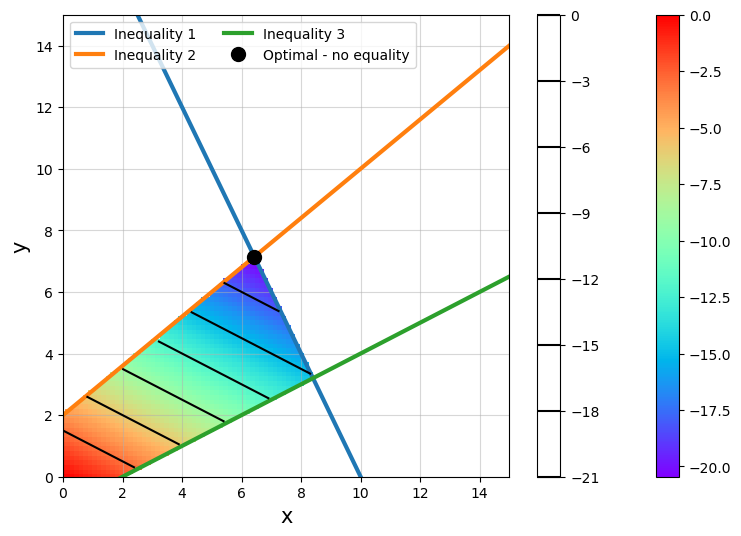

In [15]:
fig, ax = plt.subplots(figsize = [9, 6])

ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)

sizes = [5, 10, 15]

#Inequalities
for ie in range(len(rhs_ineq)):    
    y = (rhs_ineq[ie] - lhs_ineq[ie][0]*x) / lhs_ineq[ie][1]
    ax.plot(x, y, label = 'Inequality ' + str(ie+1), linewidth = 3)
     
    
im = ax.pcolormesh(xx, yy, zz, cmap = 'rainbow')
im2 = ax.contour(xx, yy, zz, colors = 'black', linestyles = '-')
  
#Result
ax.plot(opt_no_eq.x[0], opt_no_eq.x[1], 'k.', markersize = 20, label = 'Optimal - no equality')    


plt.legend(ncol = 2)
ax.set_xlim([0, max(x)])
ax.set_ylim([0, max(x)])
ax.grid(alpha=.5)
plt.colorbar(im)
plt.colorbar(im2)



**If we remove inequality 1:** <br>

In [16]:
#Left side of the inequality
lhs_ineq = [[-4,  5], 
            [ 1, -2]]  

#Right of the inequality
rhs_ineq = [10, 
            2] 

In [17]:
#We create a mask with the feasible region

index = np.full(np.shape(xx), 0)
for ie in range(len(rhs_ineq)):
    z = lhs_ineq[ie][0]*xx + lhs_ineq[ie][1]*yy
    index[np.where(z <= rhs_ineq[ie])] += 1 
mask = np.where(index < len(rhs_ineq), np.nan, 1)


In [18]:
zz = mask * (obj[0]*xx + obj[1]*yy)

In [19]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              bounds=bnd, method = 'highs')

In [20]:
opt

       message: The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is At upper bound)
       success: False
        status: 3
           fun: None
             x: None
           nit: 1
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None

**- Status = 3** : Problem appears to be unbounded.

No optimal solution found


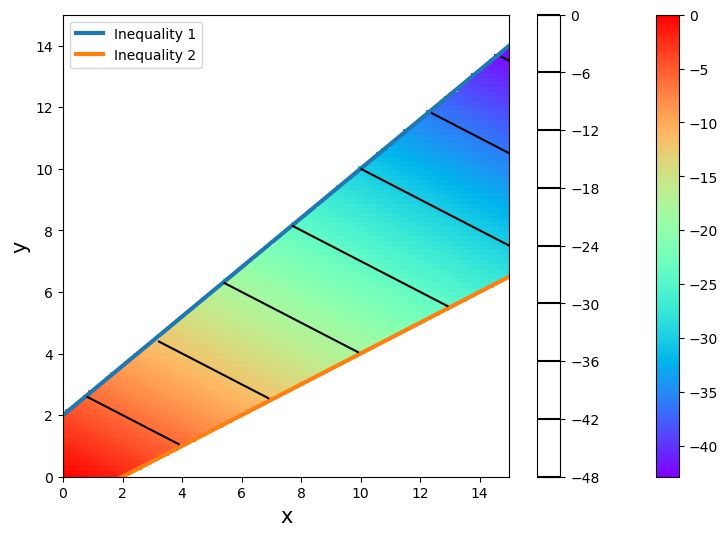

In [21]:
fig, ax = plt.subplots(figsize = [9, 6])

ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)

sizes = [5, 10, 15]

#inequality
for ie in range(len(rhs_ineq)):    
    y = (rhs_ineq[ie] - lhs_ineq[ie][0]*x) / lhs_ineq[ie][1]
    ax.plot(x, y, label = 'Inequality ' + str(ie+1), linewidth = 3, zorder = 2)

im = ax.pcolormesh(xx, yy, zz, cmap = 'rainbow')
im2 = ax.contour(xx, yy, zz, colors = 'black', linestyles = '-')
 
try:
    ax.plot(opt.x[0], opt.x[1], 'k.', markersize = 20, label = 'Optimal')   
except:
    print('No optimal solution found')

plt.legend()
ax.set_xlim([0, max(x)])
ax.set_ylim([0, max(x)])
plt.colorbar(im)
plt.colorbar(im2)

**If we change the objective function to:** <br>

$$ -z = -0.5x+y$$

In [22]:
obj = [-0.5, 1] #Coefficients for x and y

In [23]:
#Left side of the inequality
lhs_ineq = [[ 2,  1], 
            [-4,  5], 
            [ 1, -2]]  

#Right of the inequality
rhs_ineq = [20,  
            10, 
            2] 

In [24]:
#We create a mask with the feasible region

index = np.full(np.shape(xx), 0)
for ie in range(len(rhs_ineq)):
    z = lhs_ineq[ie][0]*xx + lhs_ineq[ie][1]*yy
    index[np.where(z <= rhs_ineq[ie])] += 1 
mask = np.where(index < len(rhs_ineq), np.nan, 1)


In [25]:
zz = mask * (obj[0]*xx + obj[1]*yy)

In [26]:
opt_no_eq = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              bounds=bnd, method = 'highs')

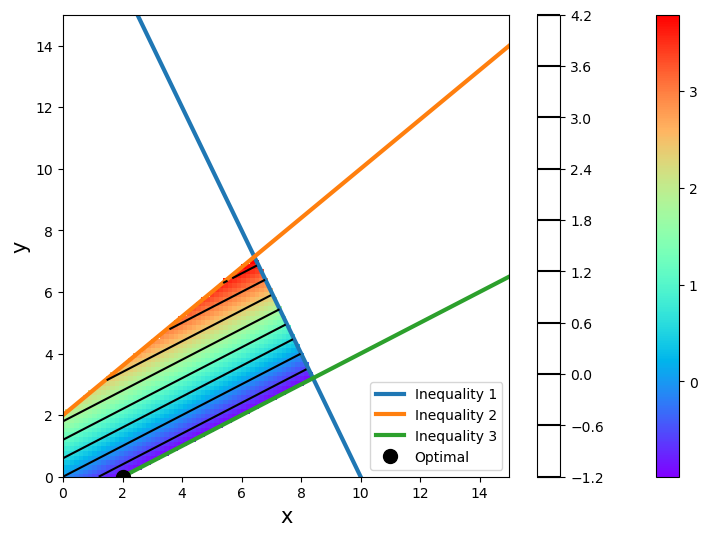

In [27]:
fig, ax = plt.subplots(figsize = [9, 6])

ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)

sizes = [5, 10, 15]

#inequality
for ie in range(len(rhs_ineq)):    
    y = (rhs_ineq[ie] - lhs_ineq[ie][0]*x) / lhs_ineq[ie][1]
    ax.plot(x, y, label = 'Inequality ' + str(ie+1), linewidth = 3, zorder = 2)

im = ax.pcolormesh(xx, yy, zz, cmap = 'rainbow')
im2 = ax.contour(xx, yy, zz, colors = 'black', linestyles = '-')
 
ax.plot(opt_no_eq.x[0], opt_no_eq.x[1], 'k.', markersize = 20, label = 'Optimal')        

plt.legend()
ax.set_xlim([0, max(x)])
ax.set_ylim([0, max(x)])
plt.colorbar(im)
plt.colorbar(im2)

We can easily see graphically how there are infinite number of optimal solutions lying over the Inequality 1 line, nevertheless, the linprog library will only give one of those assuming there is no preference. <br>

If there is any preference, this should be included with more inequalities or equalities

If for example we wont x  to be equal to 4:

In [28]:
#Left side of the equality
lhs_eq = [[1, 0]]  

#Right of the equality
rhs_eq = [4] 

In [29]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd)

---

**Plot result**

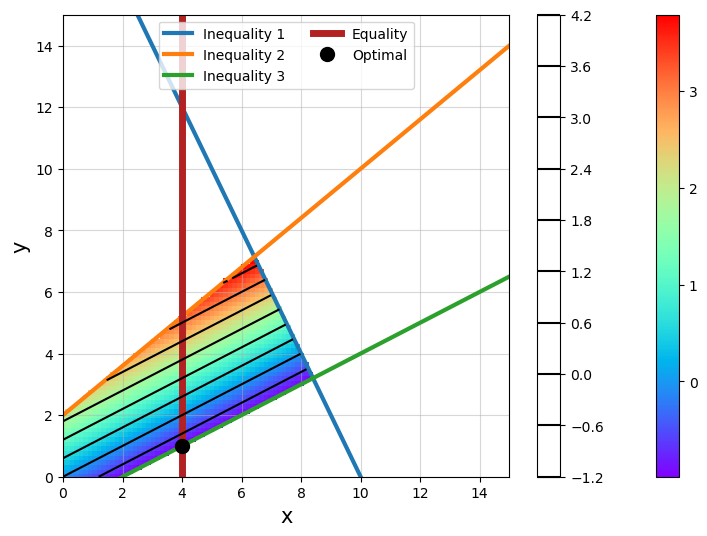

In [30]:
fig, ax = plt.subplots(figsize = [9, 6])

ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)

sizes = [5, 10, 15]

#Inequalities
for ie in range(len(rhs_ineq)):    
    y = (rhs_ineq[ie] - lhs_ineq[ie][0]*x) / lhs_ineq[ie][1]
    ax.plot(x, y, label = 'Inequality ' + str(ie+1), linewidth = 3)
    
#Equalities
for ie in range(len(rhs_eq)):   
    
    if lhs_eq[ie][1] != 0:
        y = (rhs_eq[ie] - lhs_eq[ie][0]*x) / lhs_eq[ie][1]
        ax.plot(x, y, label =  'Equality', linewidth = 5) 
    elif lhs_eq[ie][0] == 0:
        ax.axhline(x = lhs_eq[ie][1] * rhs_eq[ie], linewidth = 5, color = 'firebrick', label = 'Equality')
    else:
        ax.axvline(x = lhs_eq[ie][0] * rhs_eq[ie], linewidth = 5, color = 'firebrick', label = 'Equality')

       
    
im = ax.pcolormesh(xx, yy, zz, cmap = 'rainbow')
im2 = ax.contour(xx, yy, zz, colors = 'black', linestyles = '-')
  
#Result
ax.plot(opt.x[0], opt.x[1], 'k.', markersize = 20, label = 'Optimal')    

plt.legend(ncol = 2)
ax.set_xlim([0, max(x)])
ax.set_ylim([0, max(x)])
ax.grid(alpha=.5)
plt.colorbar(im)
plt.colorbar(im2)